In [8]:
from pylab import *
from PIL import Image
from matplotlib import pyplot as plt
from numpy import *
from scipy.ndimage import filters
import cv2
import math

<ipython-input-9-902404397074>:57: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter([p[1] for p in filtered_coords], [p[0] for p in filtered_coords], color='', marker='o',edgecolors='r', s=200)
<ipython-input-9-902404397074>:61: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter([p[1] for p in filtered_coords], [p[0] for p in filtered_coords], color='', marker='o',edgecolors='r', s=200)


(-0.5, 4031.5, 3023.5, -0.5)

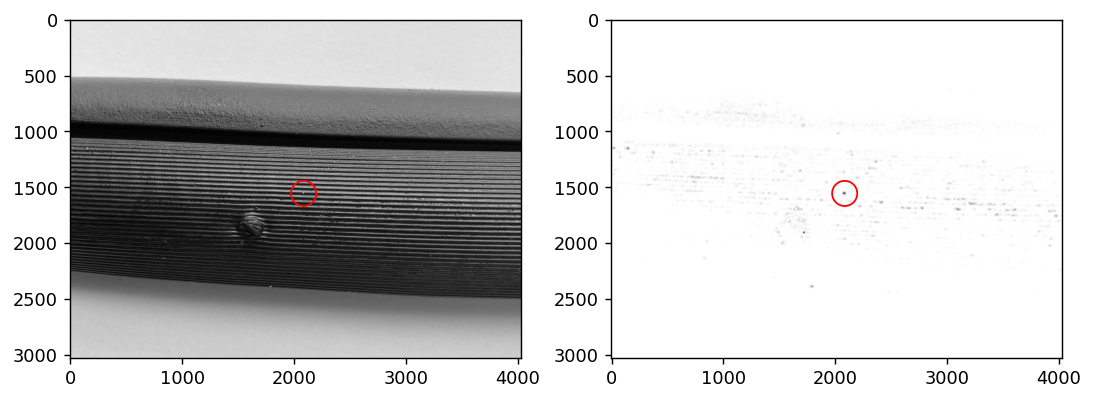

In [9]:
def compute_harris_response(im,sigma=5):

    imx = zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)
    imy = zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (1,0), imy)

    Wxx = filters.gaussian_filter(imx*imx,sigma)
    Wxy = filters.gaussian_filter(imx*imy,sigma)
    Wyy = filters.gaussian_filter(imy*imy,sigma)

    Wdet = Wxx*Wyy - Wxy**2
    Wtr = Wxx + Wyy
    return (Wdet/Wtr)



def get_harris_points(harrisim,min_dist=50,threshold=1):

    corner_threshold = harrisim.max() * threshold
    harrisim_t = (harrisim > corner_threshold)*1

    coords = array(harrisim_t.nonzero()).T

    candidate_values = [harrisim[c[0],c[1]] for c in coords]

    index = argsort(candidate_values)[::-1]

    allowed_locations = zeros(harrisim.shape)
    allowed_locations[min_dist:-min_dist,min_dist:-min_dist] = 1

    filtered_coords = []
    for i in index:
        if allowed_locations[coords[i,0],coords[i,1]] == 1:
            filtered_coords.append(coords[i])
            allowed_locations[(coords[i,0]-min_dist):(coords[i,0]+min_dist), 
                        (coords[i,1]-min_dist):(coords[i,1]+min_dist)] = 0
    return filtered_coords

im = array(Image.open('img/2.jpg').convert('L'))

harrisim = compute_harris_response(im)
harrisim1 = 255 - harrisim
plt.figure(dpi=128,figsize=(10,6))

gray()


threshold = [0.9]
for i, thres in enumerate(threshold):
    filtered_coords = get_harris_points(harrisim, 6, thres)

    plt.subplot(1, 2, i+1)

    imshow(im)

    plt.scatter([p[1] for p in filtered_coords], [p[0] for p in filtered_coords], color='', marker='o',edgecolors='r', s=200)

    plt.subplot(1,2,2)
    imshow(harrisim1)
    plt.scatter([p[1] for p in filtered_coords], [p[0] for p in filtered_coords], color='', marker='o',edgecolors='r', s=200)

x=[122,211]
y=[444,555]

axis('on')



17404.423300887454
16989.7330706136
17033.71536776386
16788.671140783856
19647.520455550566
19427.60896979928
17435.839227423352
17052.564923685397
36744.06767638622
36360.793372648266
19628.67089962903
19320.794819577226
18962.653257067992
18635.927621094652
27859.643652034287
27627.16579566864
16405.3968370459


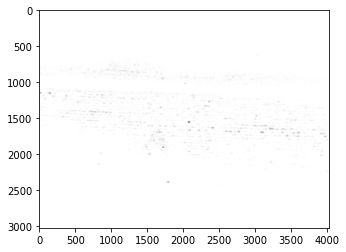

In [10]:
im_gauss = cv2.GaussianBlur(harrisim1, (5, 5), 0)

img = cv2.imread('img/2.jpg')
img2 = np.zeros_like(img)

figure()
gray()

imshow(im_gauss)

img2[:,:,0] = im_gauss
img2[:,:,1] = im_gauss
img2[:,:,2] = im_gauss

edges = cv2.Canny(img2,0,1)
ret, thresh = cv2.threshold(img2,0, 1, 0)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

contours_area = []

for con in contours:
    area = cv2.contourArea(con)
    if 1280 < area < 10000:
        contours_area.append(con)
        
        
contours_cirles = []

for con in contours_area:
    perimeter = cv2.arcLength(con, True)
    area = cv2.contourArea(con)
    if perimeter == 0:
        break
    circularity = 4*math.pi*(area/perimeter*perimeter)
    print(circularity)
    if 0.8 < circularity < 1.2:
        contours_cirles.append(con)
